# Downloads Datas From MT5

In [49]:


import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from binance.client import Client
from statistics import mean
import os
import sys 

from rich import print
from rich.console import Console
from rich.style import Style
import pandas as pd 
import numpy as np
from datetime import datetime 
import requests
import json

import time

import schedule

from pandas_datareader import data, wb
import datetime
# plt.rcParams['figure.figsize'] = [12, 7]
# plt.rc('font', size=14)



In [3]:
host = "localhost"
port = 8090
debug = True

url = f"http://{host}:{port}"
os.system('cls')
cs = Console()
cs.log("Client")
cs.log(host,port)

[09:08:48] Client                                         ]8;id=158828;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2841750992.py\Temp/ipykernel_7588/2841750992.py]8;;\:]8;id=977633;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2841750992.py#8\8]8;;\

           localhost 8090                                 ]8;id=713789;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2841750992.py\Temp/ipykernel_7588/2841750992.py]8;;\:]8;id=571893;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2841750992.py#9\9]8;;\

In [5]:
cs.log("Try to get Connection : "+url)
r = requests.get(url)
cs.log(r.text)
name = "GOLD"#input('Enter Symbol Name :')
timeframe = "M1"
num_bars= 2000
signal = 0
count = 0
triger_signal_init = 0
lot = 0.02	
comment = f'Ichimoku_{timeframe}'


[09:09:19] Try to get Connection : http://localhost:8090  ]8;id=267663;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2535925695.py\Temp/ipykernel_7588/2535925695.py]8;;\:]8;id=988990;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2535925695.py#1\1]8;;\

           {"status":1,"message":"ok","Serveur":"Serveur  ]8;id=418693;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2535925695.py\Temp/ipykernel_7588/2535925695.py]8;;\:]8;id=858257;file://C:\Users\Azazel\AppData\Local\Temp\ipykernel_7588\2535925695.py#3\3]8;;\
           Finance"}

In [6]:
route_data = f"{url}/OHLC/{name}/{timeframe}/{num_bars}"
r2 = requests.get(route_data)
data = json.loads(r2.text)
df = pd.read_json(data)
df

,open,high,low,close,tick_volume,spread,real_volume
2022-03-21 22:48:00,1935.10,1935.10,1934.91,1935.10,9,250,0
2022-03-21 22:49:00,1935.10,1935.11,1934.66,1934.71,14,260,0
2022-03-21 22:50:00,1934.71,1934.71,1934.47,1934.57,10,250,0
2022-03-21 22:51:00,1934.52,1934.72,1934.52,1934.62,5,300,0
2022-03-21 22:52:00,1934.67,1934.82,1934.62,1934.77,7,270,0
...,...,...,...,...,...,...,...
2022-03-23 10:05:00,1921.37,1921.62,1921.23,1921.43,72,280,0
2022-03-23 10:06:00,1921.43,1922.19,1921.20,1921.20,79,140,0
2022-03-23 10:07:00,1921.22,1921.98,1921.20,1921.64,68,146,0
2022-03-23 10:08:00,1921.64,1921.78,1921.47,1921.78,38,180,0


In [7]:
mask_chikou = df.copy()
mask_chikou['chikou'] = mask_chikou.close.shift(-26).dropna()
mask_chikou.dropna(inplace=True)

In [8]:
mask_chikou

,open,high,low,close,tick_volume,spread,real_volume,chikou
2022-03-21 22:48:00,1935.10,1935.10,1934.91,1935.10,9,250,0,1935.87
2022-03-21 22:49:00,1935.10,1935.11,1934.66,1934.71,14,260,0,1936.08
2022-03-21 22:50:00,1934.71,1934.71,1934.47,1934.57,10,250,0,1936.45
2022-03-21 22:51:00,1934.52,1934.72,1934.52,1934.62,5,300,0,1936.04
2022-03-21 22:52:00,1934.67,1934.82,1934.62,1934.77,7,270,0,1936.30
...,...,...,...,...,...,...,...,...
2022-03-23 09:39:00,1919.76,1920.18,1919.75,1919.88,53,240,0,1921.43
2022-03-23 09:40:00,1919.88,1919.88,1919.52,1919.59,50,160,0,1921.20
2022-03-23 09:41:00,1919.60,1919.94,1919.60,1919.65,45,286,0,1921.64
2022-03-23 09:42:00,1919.61,1920.02,1919.61,1919.90,25,240,0,1921.78


In [9]:
nine_periodf_high = df['high'].rolling(window= 9).max()
nine_periodf_low = df['low'].rolling(window= 9).min()

periodf26_high = df['high'].rolling(window=26).max()
periodf26_low = df['low'].rolling(window=26).min()


df['tenkan_sen'] = (nine_periodf_high + nine_periodf_low) /2

# Kijun-sen (Base Line): (26-periodf high + 26-periodf low)/2))
df['kijun_sen'] = (periodf26_high + periodf26_low) / 2
df['prev_kijun_sen'] = df['kijun_sen'].shift(1)
df['prev_tenkan_sen'] = df['tenkan_sen'].shift(1)

In [10]:
# Senkou Span A (Leadfing Span A): (Conversion Line + Base Line)/2))
df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)
# Senkou Span B (Leadfing Span B): (52-periodf high + 52-periodf low)/2))
periodf52_high = df['high'].rolling(window=52).max()
periodf52_low = df['low'].rolling(window=52).min()
df['senkou_span_b'] = ((periodf52_high + periodf52_low) / 2).shift(52)

In [11]:
df.tail(4)

,open,high,low,close,tick_volume,spread,real_volume,tenkan_sen,kijun_sen,prev_kijun_sen,prev_tenkan_sen,senkou_span_a,senkou_span_b
2022-03-23 10:06:00,1921.43,1922.19,1921.20,1921.20,79,140,0,1921.110,1920.575,1920.290,1920.645,1919.1550,1918.095
2022-03-23 10:07:00,1921.22,1921.98,1921.20,1921.64,68,146,0,1921.200,1920.575,1920.575,1921.110,1919.3000,1918.095
2022-03-23 10:08:00,1921.64,1921.78,1921.47,1921.78,38,180,0,1921.285,1920.575,1920.575,1921.200,1919.3425,1918.095
2022-03-23 10:09:00,1921.78,1922.23,1921.54,1921.78,20,160,0,1921.325,1920.595,1920.575,1921.285,1919.4875,1918.095


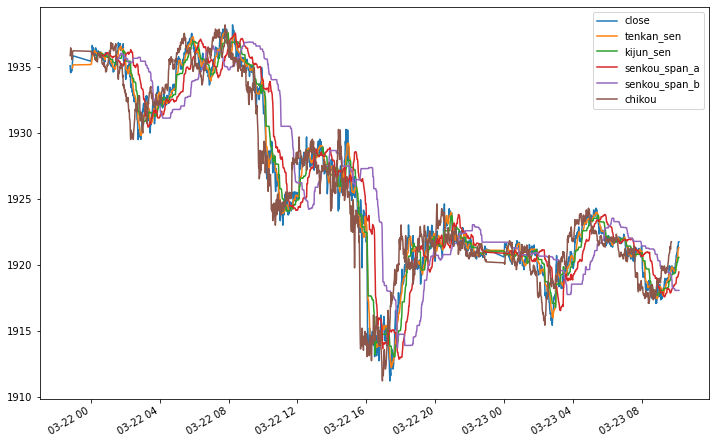

In [17]:
plt.figure(figsize=(12,8))
df.close.plot()
df.tenkan_sen.plot()
df.kijun_sen.plot()
df.senkou_span_a.plot()
df.senkou_span_b.plot()

mask_chikou['chikou'].plot()
plt.legend()


In [14]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

In [16]:
# Set colours for up and down candles
INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'
# create list to hold dictionary with data for our first series to plot
# (which is the candlestick element itself)
data1 = [ dict(
    type = 'candlestick',
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
    x = df.index,
    yaxis = 'y2',
    name = 'F',
    increasing = dict( line = dict( color = INCREASING_COLOR ) ),
    decreasing = dict( line = dict( color = DECREASING_COLOR ) ),
) ]

In [21]:
# Create empty dictionary for later use to hold settings and layout options
layout=dict()
# create our main chart "Figure" object which consists of data to plot and layout settings
fig = dict( data=data1, layout=layout )
# Assign various seeting and choices - background colour, range selector etc
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )
fig['layout']['height'] = 900
fig['layout']['width'] = 1300

# Populate the "rangeselector" object with necessary settings
rangeselector=dict(
    visible = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150, 200, 250, 0.4)',
    font = dict( size = 13 ),
    buttons=list([
        dict(count=1,
             label='reset',
             step='all'),
        dict(count=1,
             label='1yr',
             step='year',
             stepmode='backward'),
        dict(count=3,
            label='3 mo',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label='1 mo',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))
    
fig['layout']['xaxis']['rangeselector'] = rangeselector
# Append the Ichimoku elements to the plot
fig['data'].append( dict( x=df['tenkan_sen'].index, y=df['tenkan_sen'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#33BDFF' ),
                         yaxis = 'y2', name='tenkan_sen' ) )
fig['data'].append( dict( x=df['kijun_sen'].index, y=df['kijun_sen'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#F1F316' ),
                         yaxis = 'y2', name='kijun_sen' ) )
fig['data'].append( dict( x=df['senkou_span_a'].index, y=df['senkou_span_a'], type='scatter', mode='lines', 
                         line = dict( width = 1 ), 
                         marker = dict( color = '#228B22' ),
                         yaxis = 'y2', name='senkou_span_a' ) )
fig['data'].append( dict( x=df['senkou_span_b'].index, y=df['senkou_span_b'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),fill='tonexty',
                         marker = dict( color = '#FF3342' ),
                         yaxis = 'y2', name='senkou_span_b' ) )
fig['data'].append( dict( x=mask_chikou['chikou'].index, y=mask_chikou['chikou'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#D105F5' ),
                         yaxis = 'y2', name='chikou_span' ) )

# Set colour list for candlesticks
colors = []
for i in range(len(df.close)):
    if i != 0:
        if df.close[i] > df.close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
        
iplot( fig, filename = 'candlestick-ichimoku' )

In [22]:
#d.dropna(inplace=True)
df['above_cloud'] = 0
df['above_cloud'] = np.where((df['low'] > df['senkou_span_a'])  & (df['low'] > df['senkou_span_b'] ), 1, df['above_cloud'])
df['above_cloud'] = np.where((df['high'] < df['senkou_span_a']) & (df['high'] < df['senkou_span_b']), -1, df['above_cloud'])
df['A_above_B'] = np.where((df['senkou_span_a'] > df['senkou_span_b']), 1, -1)

In [24]:
df['tenkan_kiju_cross'] = np.NaN
df['tenkan_kiju_cross'] = np.where((df['tenkan_sen'].shift(1) <= df['kijun_sen'].shift(1)) & (df['tenkan_sen'] > df['kijun_sen']), 1, df['tenkan_kiju_cross'])
df['tenkan_kiju_cross'] = np.where((df['tenkan_sen'].shift(1) >= df['kijun_sen'].shift(1)) & (df['tenkan_sen'] < df['kijun_sen']), -1, df['tenkan_kiju_cross'])
df['price_tenkan_cross'] = np.NaN
df['price_tenkan_cross'] = np.where((df['open'].shift(1) <= df['tenkan_sen'].shift(1)) & (df['open'] > df['tenkan_sen']), 1, df['price_tenkan_cross'])
df['price_tenkan_cross'] = np.where((df['open'].shift(1) >= df['tenkan_sen'].shift(1)) & (df['open'] < df['tenkan_sen']), -1, df['price_tenkan_cross'])

In [25]:
df.tail()

,open,high,low,close,tick_volume,spread,real_volume,tenkan_sen,kijun_sen,prev_kijun_sen,prev_tenkan_sen,senkou_span_a,senkou_span_b,above_cloud,A_above_B,tenkan_kiju_cross,price_tenkan_cross
2022-03-23 10:05:00,1921.37,1921.62,1921.23,1921.43,72,280,0,1920.645,1920.290,1920.245,1920.585,1919.1400,1918.095,1,1,NaN,NaN
2022-03-23 10:06:00,1921.43,1922.19,1921.20,1921.20,79,140,0,1921.110,1920.575,1920.290,1920.645,1919.1550,1918.095,1,1,NaN,NaN
2022-03-23 10:07:00,1921.22,1921.98,1921.20,1921.64,68,146,0,1921.200,1920.575,1920.575,1921.110,1919.3000,1918.095,1,1,NaN,NaN
2022-03-23 10:08:00,1921.64,1921.78,1921.47,1921.78,38,180,0,1921.285,1920.575,1920.575,1921.200,1919.3425,1918.095,1,1,NaN,NaN
2022-03-23 10:09:00,1921.78,1922.23,1921.54,1921.78,20,160,0,1921.325,1920.595,1920.575,1921.285,1919.4875,1918.095,1,1,NaN,NaN


In [27]:
df['buy'] = np.NaN
df['buy'] = np.where((df['above_cloud'].shift(1) == 1) & (df['A_above_B'].shift(1) == 1) & ((df['tenkan_kiju_cross'].shift(1) == 1) | (df['price_tenkan_cross'].shift(1) == 1)), 1, df['buy'])
df['buy'] = np.where(df['tenkan_kiju_cross'].shift(1) == -1, 0, df['buy'])
df['buy'].ffill(inplace=True)

df['sell'] = np.NaN
df['sell'] = np.where((df['above_cloud'].shift(1) == -1) & (df['A_above_B'].shift(1) == -1) & ((df['tenkan_kiju_cross'].shift(1) == -1) | (df['price_tenkan_cross'].shift(1) == -1)), -1, df['sell'])
df['sell'] = np.where(df['tenkan_kiju_cross'].shift(1) == 1, 0, df['sell'])
df['sell'].ffill(inplace=True)
df['position'] = df['buy'] + df['sell']

In [28]:
df.tail()

,open,high,low,close,tick_volume,spread,real_volume,tenkan_sen,kijun_sen,prev_kijun_sen,prev_tenkan_sen,senkou_span_a,senkou_span_b,above_cloud,A_above_B,tenkan_kiju_cross,price_tenkan_cross,buy,sell,position
2022-03-23 10:05:00,1921.37,1921.62,1921.23,1921.43,72,280,0,1920.645,1920.290,1920.245,1920.585,1919.1400,1918.095,1,1,NaN,NaN,1.0,0.0,1.0
2022-03-23 10:06:00,1921.43,1922.19,1921.20,1921.20,79,140,0,1921.110,1920.575,1920.290,1920.645,1919.1550,1918.095,1,1,NaN,NaN,1.0,0.0,1.0
2022-03-23 10:07:00,1921.22,1921.98,1921.20,1921.64,68,146,0,1921.200,1920.575,1920.575,1921.110,1919.3000,1918.095,1,1,NaN,NaN,1.0,0.0,1.0
2022-03-23 10:08:00,1921.64,1921.78,1921.47,1921.78,38,180,0,1921.285,1920.575,1920.575,1921.200,1919.3425,1918.095,1,1,NaN,NaN,1.0,0.0,1.0
2022-03-23 10:09:00,1921.78,1922.23,1921.54,1921.78,20,160,0,1921.325,1920.595,1920.575,1921.285,1919.4875,1918.095,1,1,NaN,NaN,1.0,0.0,1.0


<AxesSubplot:>

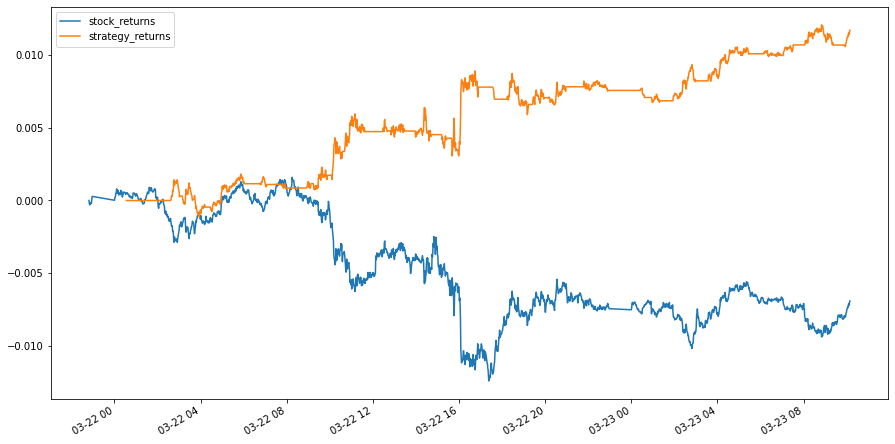

In [29]:
df['stock_returns'] = np.log(df['open']) - np.log(df['open'].shift(1))
df['strategy_returns'] = df['stock_returns'] * df['position']
df[['stock_returns','strategy_returns']].cumsum().plot(figsize=(15,8))

In [50]:
def ichimoku(ticker, start, end):
    d=data.DataReader(ticker, 'yahoo', start, end)[['Open','High','Low','Close']]
    # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
    nine_period_high = d['High'].rolling(window= 9).max()
    nine_period_low = d['Low'].rolling(window= 9).min()
    d['tenkan_sen'] = (nine_period_high + nine_period_low) /2
    # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
    period26_high = d['High'].rolling(window=26).max()
    period26_low = d['Low'].rolling(window=26).min()
    d['kijun_sen'] = (period26_high + period26_low) / 2
    # Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
    d['senkou_span_a'] = ((d['tenkan_sen'] + d['kijun_sen']) / 2).shift(26)
    # Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
    period52_high = d['High'].rolling(window=52).max()
    period52_low = d['Low'].rolling(window=52).min()
    d['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(52)
    # The most current closing price plotted 26 time periods behind (optional)
    d['chikou_span'] = d['Close'].shift(-26)
    d.dropna(inplace=True)
    d['above_cloud'] = 0
    d['above_cloud'] = np.where((d['Low'] > d['senkou_span_a'])  & (d['Low'] > d['senkou_span_b'] ), 1, d['above_cloud'])
    d['above_cloud'] = np.where((d['High'] < d['senkou_span_a']) & (d['High'] < d['senkou_span_b']), -1, d['above_cloud'])
    d['A_above_B'] = np.where((d['senkou_span_a'] > d['senkou_span_b']), 1, -1)
    d['tenkan_kiju_cross'] = np.NaN
    d['tenkan_kiju_cross'] = np.where((d['tenkan_sen'].shift(1) <= d['kijun_sen'].shift(1)) & (d['tenkan_sen'] > d['kijun_sen']), 1, d['tenkan_kiju_cross'])
    d['tenkan_kiju_cross'] = np.where((d['tenkan_sen'].shift(1) >= d['kijun_sen'].shift(1)) & (d['tenkan_sen'] < d['kijun_sen']), -1, d['tenkan_kiju_cross'])
    d['price_tenkan_cross'] = np.NaN
    d['price_tenkan_cross'] = np.where((d['Open'].shift(1) <= d['tenkan_sen'].shift(1)) & (d['Open'] > d['tenkan_sen']), 1, d['price_tenkan_cross'])
    d['price_tenkan_cross'] = np.where((d['Open'].shift(1) >= d['tenkan_sen'].shift(1)) & (d['Open'] < d['tenkan_sen']), -1, d['price_tenkan_cross'])
    d['buy'] = np.NaN
    d['buy'] = np.where((d['above_cloud'].shift(1) == 1) & (d['A_above_B'].shift(1) == 1) & ((d['tenkan_kiju_cross'].shift(1) == 1) | (d['price_tenkan_cross'].shift(1) == 1)), 1, d['buy'])
    d['buy'] = np.where(d['tenkan_kiju_cross'].shift(1) == -1, 0, d['buy'])
    d['buy'].ffill(inplace=True)

    d['sell'] = np.NaN
    d['sell'] = np.where((d['above_cloud'].shift(1) == -1) & (d['A_above_B'].shift(1) == -1) & ((d['tenkan_kiju_cross'].shift(1) == -1) | (d['price_tenkan_cross'].shift(1) == -1)), -1, d['sell'])
    d['sell'] = np.where(d['tenkan_kiju_cross'].shift(1) == 1, 0, d['sell'])
    d['sell'].ffill(inplace=True)
    d['position'] = d['buy'] + d['sell']
    d['stock_returns'] = np.log(d['Open']) - np.log(d['Open'].shift(1))
    d['strategy_returns'] = d['stock_returns'] * d['position']
    d[['stock_returns','strategy_returns']].cumsum().plot(figsize=(15,8))

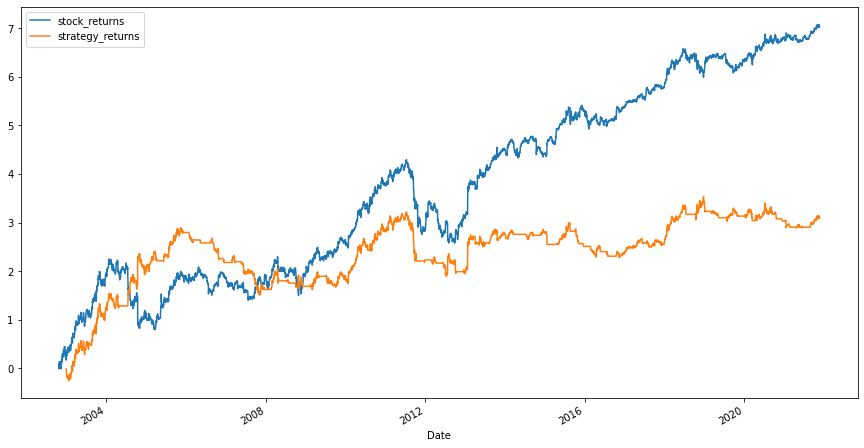

In [51]:
ticker = 'NFLX'
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2022, 1, 1)
ichimoku(ticker, start, end)

In [41]:
print(data)

None